In [50]:
import json
from monty.json import MontyDecoder,MontyEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
with open("Ti_data_both.json") as f:
    data=json.loads(f.read(),cls=MontyDecoder)

In [3]:
import numpy as np
for i in np.arange(14013):
    if not 'structure' in data[i].keys():
        print(i)

In [8]:
bd=-47.039394/6
b1=-47.02055184878181/6
b2=-29.108143955990954/6

In [9]:
energies_dft=np.zeros(len(data))
forces_dft=[]
energies_2021=np.zeros(len(data))
forces_2021=[]
energies_2022=np.zeros(len(data))
forces_2022=[]
from tqdm import tqdm
for i in tqdm(np.arange(14013)):
    atom_num=len(data[0]['structure'].species)
    energies_dft[i]=data[i]['energy']/atom_num-bd
    forces_dft+=data[i]['forces']
    energies_2021[i]=data[i]['2021']['energy']/atom_num-b1
    forces_2021+=data[i]['2021']['forces'].tolist()
    energies_2022[i]=data[i]['2022']['energy']/atom_num-b2
    forces_2022+=data[i]['2022']['forces'].tolist()

    

for i in tqdm(np.arange(14013,len(data),1)):
    atom_num=len(data[i]['calc_properties'][0]['structure'].species)
    energies_dft[i]=data[i]['calc_properties'][0]['energy']/atom_num-bd
    forces_dft+=data[i]['calc_properties'][0]['forces']
    energies_2021[i]=data[i]['2021']['energy']/atom_num-b1
    forces_2021+=data[i]['2021']['forces'].tolist()
    energies_2022[i]=data[i]['2022']['energy']/atom_num-b2
    forces_2022+=data[i]['2022']['forces'].tolist()




100%|██████████| 8067/8067 [00:00<00:00, 53622.97it/s]


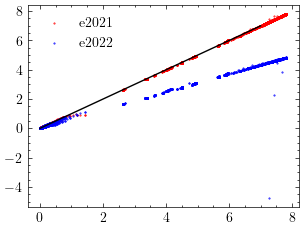

In [10]:
from matplotlib import pyplot as plt
with plt.style.context('science'):
    plt.figure()
    plt.scatter(energies_dft,energies_2021,c='r',s=0.2,label='e2021')
    plt.scatter(energies_dft,energies_2022,c='b',s=0.2,label='e2022')
    plt.plot(np.arange(8),np.arange(8),c='k')
    plt.legend()
    plt.show()
    plt.close()

In [60]:
from matplotlib import pyplot as plt
with plt.style.context('science'):
    plt.figure()
    plt.scatter(energies_dft,energies_2021,c='r',s=0.3)
    plt.legend()
    plt.xlabel(r"$\Delta E^{DFT} \enspace (eV/atom)$")
    plt.ylabel(r"$\Delta E^{pred} \enspace (eV/atom)$")
    plt.savefig("2021energy.png",dpi=200)
    plt.close()
print("RMSE=%.5f"%np.sqrt(mean_squared_error(energies_dft,energies_2021)))
print("MAE=%.5f"%mean_absolute_error(energies_dft,energies_2021))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RMSE=0.01060
MAE=0.00542


In [61]:
from matplotlib import pyplot as plt
with plt.style.context('science'):
    plt.figure()
    plt.scatter(energies_dft,energies_2022,c='r',s=0.3)
    plt.legend()
    plt.xlabel(r"$\Delta E^{DFT} \enspace (eV/atom)$")
    plt.ylabel(r"$\Delta E^{pred} \enspace (eV/atom)$")
    plt.savefig("2022energy.png",dpi=200)
    plt.close()

print("RMSE=%.5f"%np.sqrt(mean_squared_error(energies_dft,energies_2022)))
print("MAE=%.5f"%mean_absolute_error(energies_dft,energies_2022))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RMSE=2.26465
MAE=1.78295


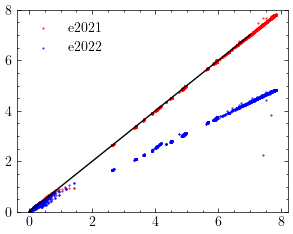

In [11]:
from matplotlib import pyplot as plt
with plt.style.context('science'):
    plt.figure()
    plt.scatter(energies_dft,energies_2021,c='r',s=0.2,label='e2021')
    plt.scatter(energies_dft,energies_2022,c='b',s=0.2,label='e2022')
    plt.plot(np.arange(8),np.arange(8),c='k')
    plt.legend()
    plt.ylim([0,8])
    plt.show()
    plt.close()

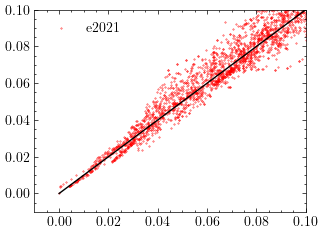

In [22]:
from matplotlib import pyplot as plt
with plt.style.context('science'):
    plt.figure()
    plt.scatter(energies_dft,energies_2021,c='r',s=0.1,label='e2021')
    plt.plot(np.arange(8),np.arange(8),c='k')
    plt.legend()
    plt.xlim([-0.01,0.1])
    plt.ylim([-0.01,0.1])
    plt.show()
    plt.close()

In [ ]:

data[-1].keys()
data[-1]['calc_properties'][0]['energy']
a=data[-1]['calc_properties'][0]['structure']


In [34]:
np.max(abs(energies_2021-energies_dft))

0.4772796940286721

In [265]:
perts=set()
for i in np.arange(len(data)):
    perts.add(data[i]['metadata']['perturbation'])
    # if abs(energies_2021[i]-energies_dft[i])>1:
    # if data[i]['metadata']['perturbation']=="volumetric":
    #     print(data[i]['metadata'])
perts

{'Burgers_Bains',
 'None',
 'aimd',
 'bcc_omega',
 'gb',
 'gsfe',
 'icsd',
 'phonons',
 'strain',
 'surfaces',
 'vacancies',
 'vacancies_ideal',
 'volumetric'}

In [39]:
perts=set()
for i in np.arange(len(data)):
    # if abs(energies_2021[i]-energies_dft[i])>1:
    if data[i]['metadata']['perturbation']=="volumetric":
        print(data[i]['metadata'])
        break
# perts

{'proto': 'mp-84POSCAR', 'method': 'volume_scale', 'scale': 0.020000000000000004, 'volume': 35.408301902013285, 'perturbation': 'volumetric', 'calc_loc': '/scratch/anirudhrn/titanium/vol_deform/calculations/700'}


In [ ]:
b1

-7.836758641463635

In [13]:
forces_sca_dft=np.sqrt(np.sum(np.array(forces_dft)**2,axis=1))
forces_sca_2021=np.sqrt(np.sum(np.array(forces_2021)**2,axis=1))
forces_sca_2022=np.sqrt(np.sum(np.array(forces_2022)**2,axis=1))

In [62]:
from matplotlib import pyplot as plt
with plt.style.context('science'):
    plt.figure()
    plt.scatter(forces_sca_dft,forces_sca_2021,c='r',s=0.3,label='f2021')

    plt.xlabel(r"$|F^{i}|^{DFT} \enspace (eV/Å)$")
    plt.ylabel(r"$|F^{i}|^{pred} \enspace (eV/Å)$")
    plt.savefig("2021force.png",dpi=200)
    plt.close()


print("RMSE=%.5f"%np.sqrt(mean_squared_error(forces_sca_dft,forces_sca_2021)))
print("MAE=%.5f"%mean_absolute_error(forces_sca_dft,forces_sca_2021))

RMSE=0.38359
MAE=0.17900


In [64]:
from matplotlib import pyplot as plt
with plt.style.context('science'):
    plt.figure()
    plt.scatter(forces_sca_dft,forces_sca_2022,c='r',s=0.3,label='f2022')
    plt.xlabel(r"$|F^{i}|^{DFT} \enspace (eV/Å)$")
    plt.ylabel(r"$|F^{i}|^{pred} \enspace (eV/Å)$")
    plt.savefig("2022force.png",dpi=200)
    plt.close()


print("RMSE=%.5f"%np.sqrt(mean_squared_error(forces_sca_dft,forces_sca_2022)))
print("MAE=%.5f"%mean_absolute_error(forces_sca_dft,forces_sca_2022))

RMSE=7.07958
MAE=0.24759


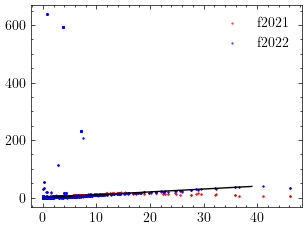

In [37]:
from matplotlib import pyplot as plt
with plt.style.context('science'):
    plt.figure()
    plt.scatter(forces_sca_dft,forces_sca_2021,c='r',s=0.2,label='f2021')
    plt.scatter(forces_sca_dft,forces_sca_2022,c='b',s=0.2,label='f2022')
    plt.plot(np.arange(40),np.arange(40),c='k')
    plt.legend()
    plt.show()

# rmse different range

In [75]:
from matplotlib import pyplot as plt
increment=0.1
standards=np.arange(increment,1+1e-7,increment)
rmses=[]
for i in standards:
    which=np.where(energies_dft<=i)
    rmse=np.sqrt(mean_squared_error(energies_dft[which],energies_2021[which]))
    rmses.append(rmse)
with plt.style.context('science'):
    plt.figure()
    plt.scatter(standards,rmses,c='r',s=0.2)
    plt.plot(standards,rmses,c='r')
    plt.xlabel(r"$\Delta E^{DFT} \enspace (eV/atom)$")
    plt.ylabel(r"$\Lambda \enspace (eV/atom)$")
    plt.savefig("2021_energyrmse_inc"+str(increment)+"_lambda.png",dpi=200)
    plt.close()

In [99]:
from matplotlib import pyplot as plt
increment=0.05
standards=np.arange(0,1+1e-7,increment)
rmses=[]
for i in np.arange(len(standards)-1):
    which=np.where((energies_dft<=standards[i+1]) & (energies_dft>standards[i]))[0]
    rmse=np.sqrt(mean_squared_error(energies_dft[which],energies_2021[which]))
    rmses.append(rmse)
with plt.style.context('science'):
    plt.figure()
    plt.scatter(standards[1:],rmses,c='r',s=0.2)
    plt.plot(standards[1:],rmses,c='r')
    plt.xlabel(r"$\Delta E^{DFT} \enspace (eV/atom)$")
    plt.ylabel(r"$\delta \enspace (eV/atom)$")
    plt.savefig("2021_energyrmse_inc"+str(increment)+"_delta.png",dpi=200)
    plt.close()

In [109]:
from matplotlib import pyplot as plt
increment=0.2
maxi=1
standards=np.arange(increment,maxi+1e-7,increment)
rmses=[]
for i in standards:
    which=np.where(forces_sca_dft<=i)
    rmse=np.sqrt(mean_squared_error(forces_sca_dft[which],forces_sca_2021[which]))
    rmses.append(rmse)
with plt.style.context('science'):
    plt.figure()
    plt.scatter(standards,rmses,c='r',s=0.2)
    plt.plot(standards,rmses,c='r')
    plt.xlabel(r"$|F^{i}|^{DFT} \enspace (eV/Å)$")
    plt.ylabel(r"$\Lambda \enspace (eV/Å)$")
    plt.savefig("2021_forcermse_inc"+str(increment)+"_maxi"+str(maxi)+"_lambda.png",dpi=200)
    plt.close()

In [113]:
from matplotlib import pyplot as plt
increment=0.1
maxi=5
standards=np.arange(0,maxi+1e-7,increment)
rmses=[]
for i in np.arange(len(standards)-1):
    which=np.where((forces_sca_dft<=standards[i+1]) & (forces_sca_dft>standards[i]))[0]
    rmse=np.sqrt(mean_squared_error(forces_sca_dft[which],forces_sca_2021[which]))
    rmses.append(rmse)
with plt.style.context('science'):
    plt.figure()
    plt.scatter(standards[1:],rmses,c='r',s=0.2)
    plt.plot(standards[1:],rmses,c='r')
    plt.xlabel(r"$|F^{i}|^{DFT} \enspace (eV/Å)$")
    plt.ylabel(r"$\delta \enspace (eV/Å)$")
    plt.savefig("2021_forcermse_inc"+str(increment)+"_maxi"+str(maxi)+"_delta.png",dpi=200)
    plt.close()

# Volumetric deformation

In [114]:
volumetric_id=[]
for i in np.arange(len(data)):
    # if abs(energies_2021[i]-energies_dft[i])>1:
    if data[i]['metadata']['perturbation']=="volumetric":
        volumetric_id.append(i)

In [122]:
protos=set()
for i in volumetric_id:
    protos.add(data[i]['metadata']['proto'])

In [160]:
len(protos)

24

In [193]:
colors=['black','dimgray','lightcoral','brown','red','orangered','chocolate',
        'burlywood','orange','darkgoldenrod','gold','olive','darkolivegreen','chartreuse',
        'green','turquoise','darkcyan','deepskyblue','dodgerblue','midnightblue','blue',
        'blueviolet','violet','deeppink']
markers=['.','o','v','^','<','>','s','*','D','1','+','x',
            '.','o','v','^','<','>','s','*','D','1','+','x']
with plt.style.context('science'):
    plt.figure()
    for i in np.arange(len(protos)):
        Vs=[]
        Es=[]
        Epreds=[]
        for j in volumetric_id:
            if data[j]['metadata']['proto']==list(protos)[i]:
                Vs.append(data[j]['metadata']['volume']/len(data[j]['structure'].species))
                Es.append(data[j]['energy']/len(data[j]['structure'].species))
                Epreds.append(data[j]['2021']['energy']/len(data[j]['structure'].species))
        Vs=np.array(Vs)
        Es=np.array(Es)-bd
        Epreds=np.array(Epreds)-b1
        order=np.argsort(Vs)
        plt.scatter(Vs[order],Es[order],c=colors[i],marker=markers[i],s=0.2,label=list(protos)[i])
        plt.plot(Vs[order],Epreds[order],c=colors[i])
    plt.xlabel(r"$\overline{V} \enspace (Å^{3}/atom)$")
    plt.ylabel(r"$\Delta E (eV/atom)$")
    plt.legend(bbox_to_anchor=(0.5, -0.05))
    plt.savefig("Volumetric_deformation.png",dpi=200)
    plt.close()
            

In [240]:
colors=['black','dimgray','lightcoral','brown','red','orangered','chocolate',
        'burlywood','orange','darkgoldenrod','gold','olive','darkolivegreen','chartreuse',
        'green','turquoise','darkcyan','deepskyblue','dodgerblue','midnightblue','blue',
        'blueviolet','violet','deeppink']
index=np.array([0,4,8,12,16,20,1,5,9,13,17,21,2,6,10,14,18,22,3,7,11,15,19,23])
colors_=[]
for i in index:
    colors_.append(colors[i])
colors=colors_
markers=['.','o','v','^','<','>','s','*','D','1','+','x',
            '.','o','v','^','<','>','s','*','D','1','+','x']
with plt.style.context('science'):
    plt.figure()
    for i in np.arange(6):
        Vs=[]
        Es=[]
        Epreds=[]
        for j in volumetric_id:
            if data[j]['metadata']['proto']==list(protos)[i]:
                Vs.append(data[j]['metadata']['volume']/len(data[j]['structure'].species))
                Es.append(data[j]['energy']/len(data[j]['structure'].species))
                Epreds.append(data[j]['2021']['energy']/len(data[j]['structure'].species))
        Vs=np.array(Vs)
        Es=np.array(Es)-bd
        Epreds=np.array(Epreds)-b1
        order=np.argsort(Vs)
        plt.scatter(Vs[order],Epreds[order],c=colors[i],marker=markers[i],s=3,label=list(protos)[i])
        plt.plot(Vs[order],Es[order],c=colors[i])
    plt.xlabel(r"$\overline{V} \enspace (Å^{3}/atom)$")
    plt.ylabel(r"$\Delta E \enspace (eV/atom)$")
    plt.legend(bbox_to_anchor=(0.5, -0.15))
    plt.savefig("Volumetric_deformation_0.png",dpi=250)
    plt.close()
            

In [241]:
with plt.style.context('science'):
    plt.figure()
    for i in np.arange(6,12,1):
        Vs=[]
        Es=[]
        Epreds=[]
        for j in volumetric_id:
            if data[j]['metadata']['proto']==list(protos)[i]:
                Vs.append(data[j]['metadata']['volume']/len(data[j]['structure'].species))
                Es.append(data[j]['energy']/len(data[j]['structure'].species))
                Epreds.append(data[j]['2021']['energy']/len(data[j]['structure'].species))
        Vs=np.array(Vs)
        Es=np.array(Es)-bd
        Epreds=np.array(Epreds)-b1
        order=np.argsort(Vs)
        plt.scatter(Vs[order],Epreds[order],c=colors[i],marker=markers[i],s=3,label=list(protos)[i])
        plt.plot(Vs[order],Es[order],c=colors[i])
    plt.xlabel(r"$\overline{V} \enspace (Å^{3}/atom)$")
    plt.ylabel(r"$\Delta E \enspace (eV/atom)$")
    plt.legend(bbox_to_anchor=(0.5, -0.15))
    plt.savefig("Volumetric_deformation_1.png",dpi=250)
    plt.close()
            

In [242]:
with plt.style.context('science'):
    plt.figure()
    for i in np.arange(12,18,1):
        Vs=[]
        Es=[]
        Epreds=[]
        for j in volumetric_id:
            if data[j]['metadata']['proto']==list(protos)[i]:
                Vs.append(data[j]['metadata']['volume']/len(data[j]['structure'].species))
                Es.append(data[j]['energy']/len(data[j]['structure'].species))
                Epreds.append(data[j]['2021']['energy']/len(data[j]['structure'].species))
        Vs=np.array(Vs)
        Es=np.array(Es)-bd
        Epreds=np.array(Epreds)-b1
        order=np.argsort(Vs)
        plt.scatter(Vs[order],Epreds[order],c=colors[i],marker=markers[i],s=3,label=list(protos)[i])
        plt.plot(Vs[order],Es[order],c=colors[i])
    plt.xlabel(r"$\overline{V} \enspace (Å^{3}/atom)$")
    plt.ylabel(r"$\Delta E \enspace (eV/atom)$")
    plt.legend(bbox_to_anchor=(0.5, -0.15))
    plt.savefig("Volumetric_deformation_2.png",dpi=250)
    plt.close()
            

In [209]:
list(protos)[23]

'mp-605790POSCAR'

In [212]:
len(colors)

22

In [264]:
with plt.style.context('science'):
    plt.figure()
    for i in np.arange(24):
        Vs=[]
        Es=[]
        Epreds=[]
        for j in volumetric_id:
            if data[j]['metadata']['proto']==list(protos)[i]:
                if data[j]['calc']=='final':
                    Vs.append(data[j]['metadata']['volume']/len(data[j]['structure'].species))
                    Es.append(data[j]['energy']/len(data[j]['structure'].species))
                    Epreds.append(data[j]['2021']['energy']/len(data[j]['structure'].species))
        Vs=np.array(Vs)
        Es=np.array(Es)-bd
        Epreds=np.array(Epreds)-b1
        order=np.argsort(Vs)
        plt.scatter(Vs[order],Es[order],c=colors[i],marker=markers[i],s=3,label=list(protos)[i])
        plt.plot(Vs[order],Epreds[order],c=colors[i])
    plt.xlabel(r"$\overline{V} \enspace (Å^{3}/atom)$")
    plt.ylabel(r"$\Delta E \enspace (eV/atom)$")
    # plt.ylim([0,0.2])
    plt.legend(bbox_to_anchor=(0.5, -0.15))
    plt.savefig("Volumetric_deformation.png",dpi=250)
    plt.close()
            

In [261]:
for i in data:
    if i['calc']!='final':
        print(i['calc'])
        break

converging


In [266]:
for i in data:
    if i['metadata']['perturbation']=='strain':
        print(i['metadata'])
        break

{'proto': 'lisi', 'special_direction': [-4.31801422007553e-32, -2.274228670934021e-16, -5.16158201609189e-65, -2.0253220243767784e-33, 1.8020786824515989e-32, 1.0], 'magnitude': 0.14285714285714288, 'perturbation': 'strain', 'calc_loc': '/scratch/anirudhrn/titanium/strain_proto/calculations/700'}
